# Reinforcement Learning 

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt 
from tqdm import tqdm 

### 1. Defining the Environment in a Matrix Structure

In [2]:
maze = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,1,0,1,1,1,1,1,1,0],
    [0,1,1,1,0,1,1,0,1,0],
    [0,0,0,1,0,1,0,0,1,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,1,0,1,0,0,0,0,0,0],
    [0,1,0,1,0,1,1,1,1,0],
    [0,1,0,0,0,1,0,0,1,0],
    [0,1,1,1,1,1,1,0,1,0],
    [0,0,0,0,0,0,0,0,0,0]
])

start = (1,1)
goal = (8,8)


### 2. Plotting the Maze

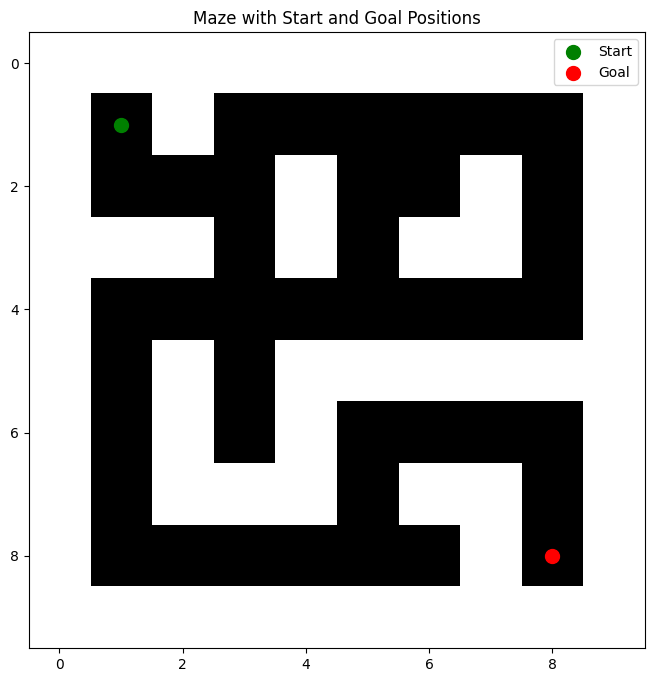

In [3]:
# Plot the maze
plt.figure(figsize=(8, 8))
plt.imshow(maze, cmap='gray_r')  # 'gray_r' makes 1s white and 0s black

plt.scatter(start[1], start[0], color='green', s=100, label="Start")
plt.scatter(goal[1], goal[0], color='red', s=100, label="Goal")

plt.title("Maze with Start and Goal Positions")
plt.legend()
plt.show()

### 3. Initialize Q-table with random values

In [4]:
#defining actions 
actions = ['up', 'down', 'left', 'right']

Q = np.random.uniform(low=-1, high=1, size=(maze.shape[0], maze.shape[1], len(actions)))

#Hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.6
epochs = 100

### 4. Defining Next Position and Training Methods

In [5]:
def get_next_position(position, action):
    
    x, y = position
    if action == 'up' and x > 0 and maze[x-1, y] == 1:
        x -= 1  # Move up
    elif action == 'down' and x < maze.shape[0]-1 and maze[x+1, y] == 1:
        x += 1  # Move down
    elif action == 'left' and y > 0 and maze[x, y-1] == 1:
        y -= 1  # Move left
    elif action == 'right' and y < maze.shape[1]-1 and maze[x, y+1] == 1:
        y += 1  # Move right
    return (x, y)  # Return the new position (if valid move) or the current position


In [6]:
# Training function for the agent
def train_agent():
    """
    Trains the agent to navigate the maze using Q-learning.
    """
    for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):  # Training loop
        position = start  # Reset agent to the starting position
        step_count = 0    # Initialize step counter
        max_steps = 1000  # Prevent infinite loops

        while position != goal and step_count < max_steps:
            step_count += 1

            # Exploration vs. Exploitation trade-off
            if random.uniform(0, 1) < epsilon:  # Random exploration
                action_index = random.randint(0, len(actions) - 1)
            else:  # Exploitation: choose action with max Q-value
                action_index = np.argmax(Q[position[0], position[1], :])
            action = actions[action_index]  # Get action string (up, down, etc.)

            # Get new position and calculate reward
            new_position = get_next_position(position, action)
            reward = 10 if new_position == goal else -1  # Goal gets +10, all else gets -1

            # Q-value update formula
            Q[position[0], position[1], action_index] += alpha * (
                reward + gamma * np.max(Q[new_position[0], new_position[1], :]) -
                Q[position[0], position[1], action_index]
            )

            # Update the agent's position
            position = new_position

        # Visualize the path every 50 epochs for progress tracking
        if epoch % 5 == 0:
            print(f"Epoch {epoch} completed.")
            visualize_path(epoch)

# Function to visualize the agent's path
def visualize_path(epoch):
    """
    Displays the path chosen by the agent based on the current Q-table.
    """
    position = start  # Start at the initial position
    path = [position]  # Store the path positions

    while position != goal:
        action_index = np.argmax(Q[position[0], position[1], :])  # Best action based on Q-values
        action = actions[action_index]
        new_position = get_next_position(position, action)

        if new_position == position:  # Avoid stuck loops (no progress)
            break
        position = new_position
        path.append(position)

    # Plot the maze and agent's path
    plt.imshow(maze, cmap="gray_r")  # Display the maze (walls in black, paths in white)
    for p in path:
        plt.scatter(p[1], p[0], c='blue', s=50)  # Plot the path positions
    plt.title(f"Agent's Path at Epoch {epoch}")
    plt.show()

Training Progress:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5 completed.


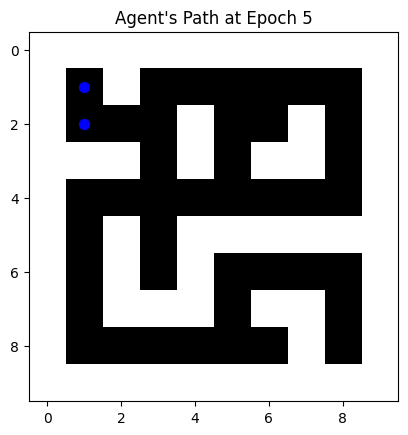

Training Progress:   5%|▌         | 5/100 [00:00<00:03, 27.77it/s]

Epoch 10 completed.


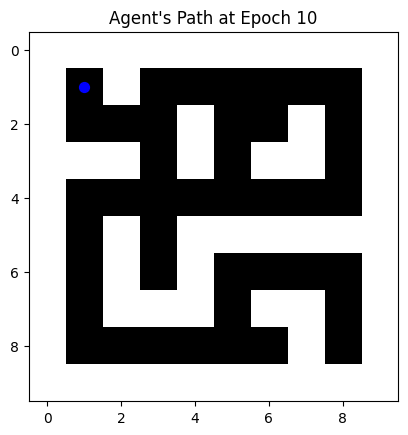

Training Progress:  10%|█         | 10/100 [00:00<00:03, 28.61it/s]

Epoch 15 completed.


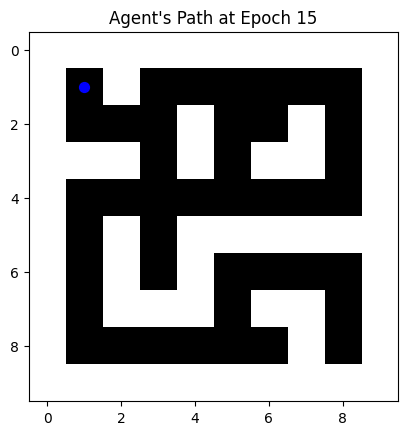

Training Progress:  15%|█▌        | 15/100 [00:00<00:03, 25.20it/s]

Epoch 20 completed.


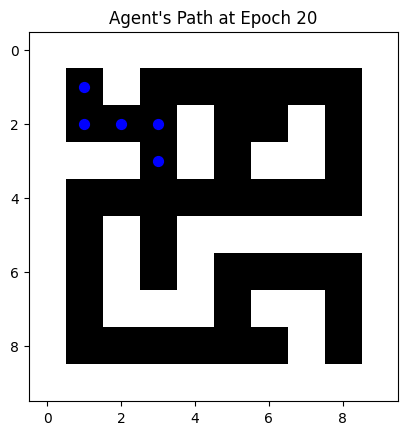

Training Progress:  20%|██        | 20/100 [00:00<00:03, 22.93it/s]

Epoch 25 completed.


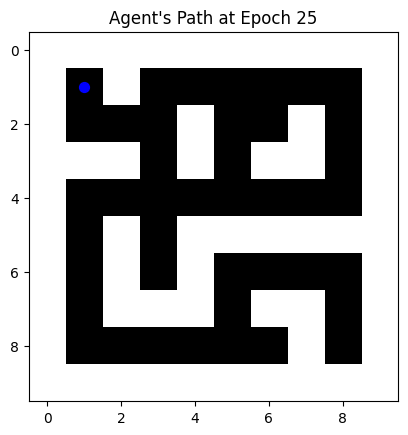

Training Progress:  25%|██▌       | 25/100 [00:01<00:03, 22.67it/s]

Epoch 30 completed.


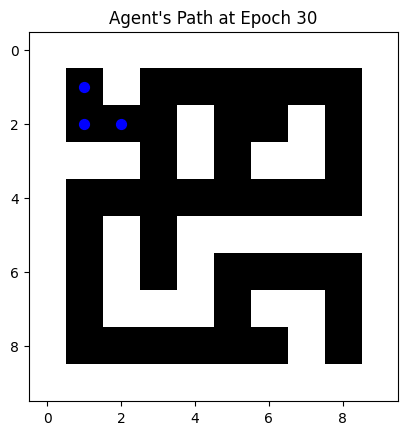

Training Progress:  30%|███       | 30/100 [00:01<00:02, 23.46it/s]

Epoch 35 completed.


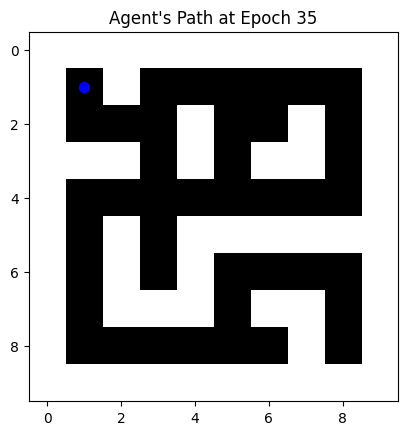

Training Progress:  35%|███▌      | 35/100 [00:01<00:02, 25.09it/s]

Epoch 40 completed.


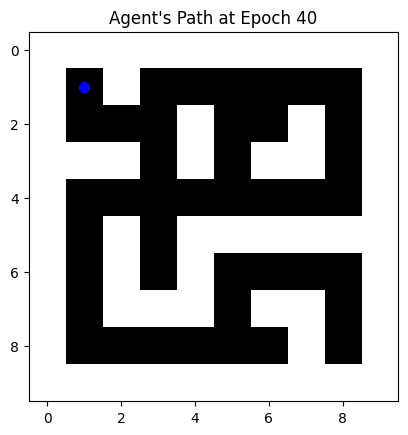

Training Progress:  40%|████      | 40/100 [00:01<00:02, 26.04it/s]

Epoch 45 completed.


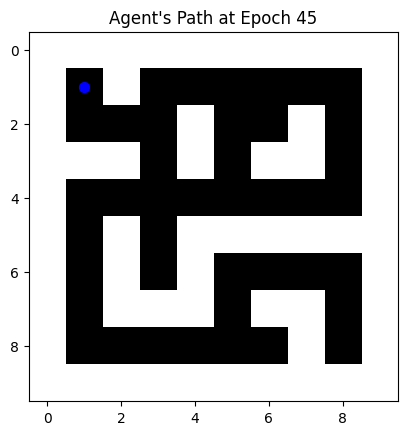

Training Progress:  45%|████▌     | 45/100 [00:01<00:02, 26.40it/s]

Epoch 50 completed.


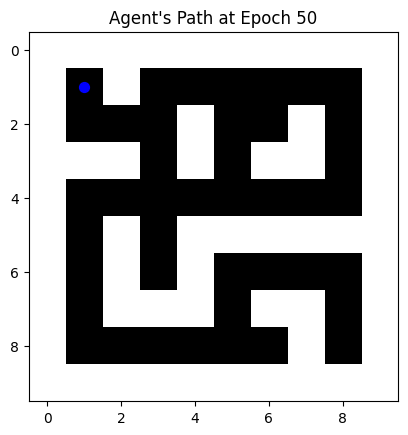

Training Progress:  50%|█████     | 50/100 [00:01<00:01, 26.79it/s]

Epoch 55 completed.


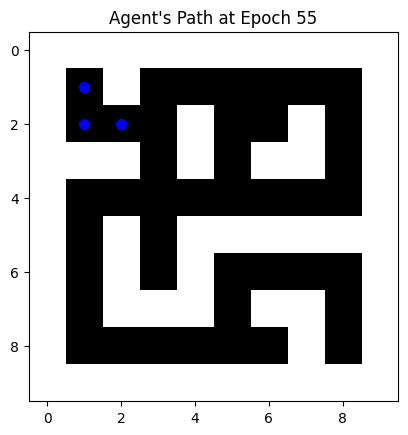

Training Progress:  55%|█████▌    | 55/100 [00:02<00:01, 26.32it/s]

Epoch 60 completed.


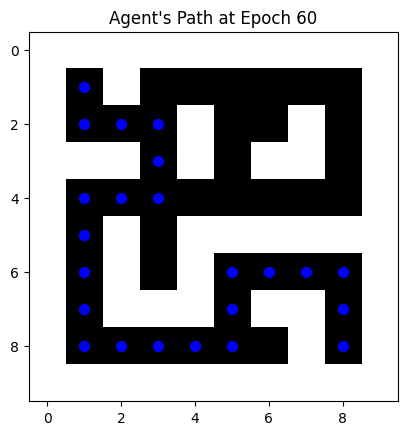

Training Progress:  60%|██████    | 60/100 [00:02<00:01, 20.22it/s]

Epoch 65 completed.


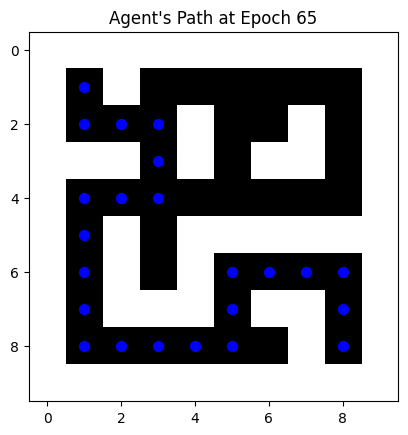

Training Progress:  65%|██████▌   | 65/100 [00:02<00:02, 17.50it/s]

Epoch 70 completed.


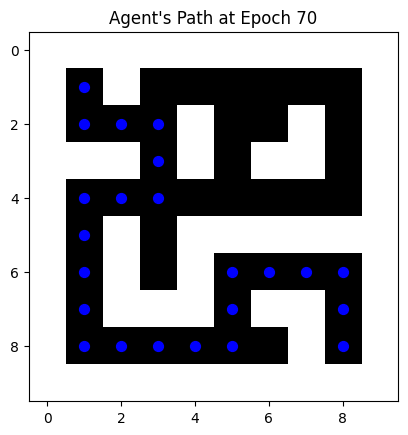

Training Progress:  70%|███████   | 70/100 [00:03<00:01, 16.30it/s]

Epoch 75 completed.


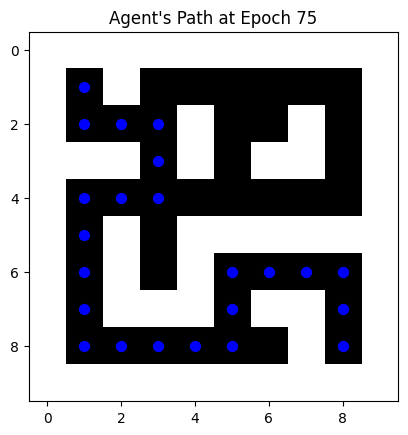

Training Progress:  75%|███████▌  | 75/100 [00:03<00:01, 15.58it/s]

Epoch 80 completed.


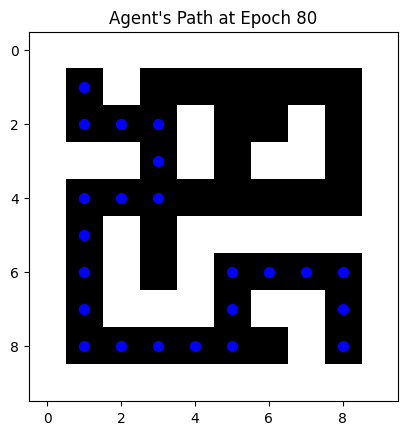

Training Progress:  80%|████████  | 80/100 [00:03<00:01, 15.06it/s]

Epoch 85 completed.


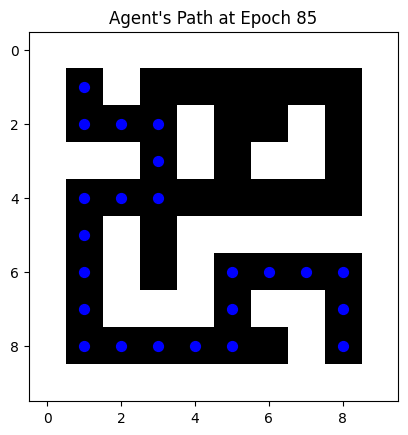

Training Progress:  85%|████████▌ | 85/100 [00:04<00:01, 12.62it/s]

Epoch 90 completed.


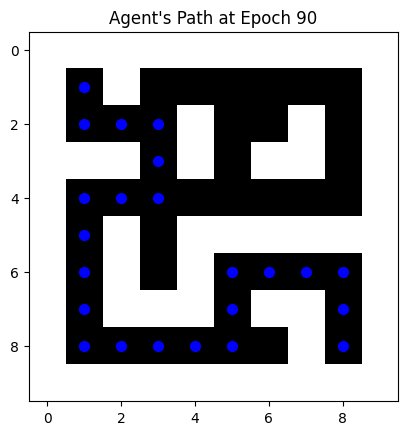

Training Progress:  90%|█████████ | 90/100 [00:04<00:00, 13.12it/s]

Epoch 95 completed.


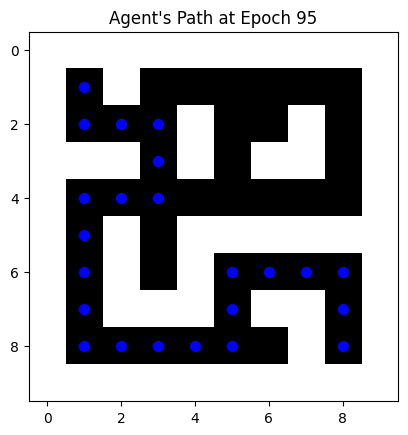

Training Progress:  95%|█████████▌| 95/100 [00:05<00:00, 13.37it/s]

Epoch 100 completed.


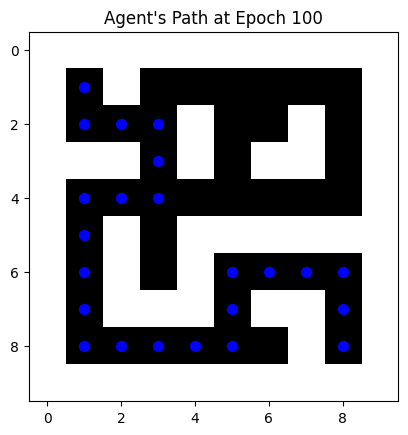

Training Progress: 100%|██████████| 100/100 [00:05<00:00, 17.92it/s]


In [8]:
train_agent()

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bar

maze = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,1,0,1,1,1,1,1,1,0],
    [0,1,1,1,0,1,1,0,1,0],
    [0,0,0,1,0,1,0,0,1,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,1,0,1,0,0,0,0,0,0],
    [0,1,0,1,0,1,1,1,1,0],
    [0,1,0,0,0,1,0,0,1,0],
    [0,1,1,1,1,1,1,0,1,0],
    [0,0,0,0,0,0,0,0,0,0]
])

start = (1,1)
goal = (8,8)

actions = ['up', 'down', 'left', 'right']
alpha = 0.1
gamma = 0.9
epsilon = 0.6
epochs = 500

# Initialize Q-table
Q = np.random.uniform(low=-1, high=1, size=(maze.shape[0], maze.shape[1], len(actions)))

def get_next_position(position, action):
    x, y = position
    if action == 'up' and x > 0 and maze[x - 1, y] == 1: x -= 1
    elif action == 'down' and x < maze.shape[0] - 1 and maze[x + 1, y] == 1: x += 1
    elif action == 'left' and y > 0 and maze[x, y - 1] == 1: y -= 1
    elif action == 'right' and y < maze.shape[1] - 1 and maze[x, y + 1] == 1: y += 1
    return (x, y)

def softmax(values):
    exp_values = np.exp(values - np.max(values))  # Stability trick
    return exp_values / np.sum(exp_values)

def train_agent():
    action_probs_per_epoch = []  # Store probabilities at specific positions over epochs
    target_positions = [(1, 1), (4, 4), (8, 8)]  # Key positions to monitor probabilities

    for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
        position = start
        step_count = 0
        max_steps = 500

        while position != goal and step_count < max_steps:
            step_count += 1

            # Exploration vs Exploitation
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(actions) - 1)
            else:
                action_index = np.argmax(Q[position[0], position[1], :])

            action = actions[action_index]
            new_position = get_next_position(position, action)
            reward = 10 if new_position == goal else -1

            # Update Q-table
            Q[position[0], position[1], action_index] += alpha * (
                reward + gamma * np.max(Q[new_position[0], new_position[1], :]) -
                Q[position[0], position[1], action_index]
            )
            position = new_position

        # Record probabilities at key positions
        action_probs = {pos: softmax(Q[pos[0], pos[1], :]) for pos in target_positions}
        action_probs_per_epoch.append(action_probs)

    visualize_action_probabilities(action_probs_per_epoch, target_positions)
    print("Training Complete!")

def visualize_action_probabilities(action_probs_per_epoch, target_positions):
    epochs_list = range(1, epochs + 1)

    for pos in target_positions:
        probs = np.array([action_probs[pos] for action_probs in action_probs_per_epoch])
        plt.figure(figsize=(8, 6))
        for i, action in enumerate(actions):
            plt.plot(epochs_list, probs[:, i], label=f'Action: {action}')
        plt.title(f"Action Probabilities at Position {pos} Over Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Probability")
        plt.legend()
        plt.grid()
        plt.show()

# Train the agent and visualize probab


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 878.42it/s] 


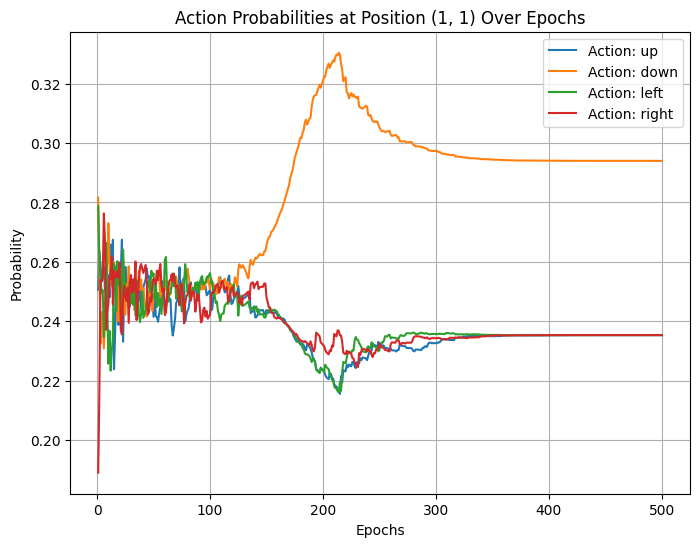

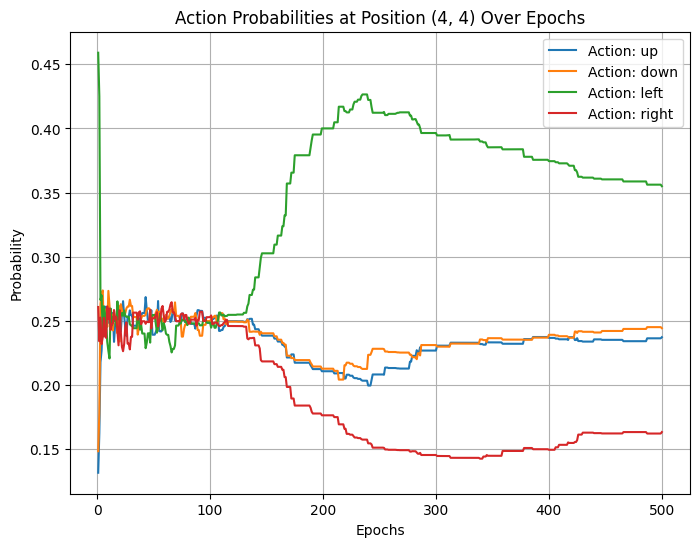

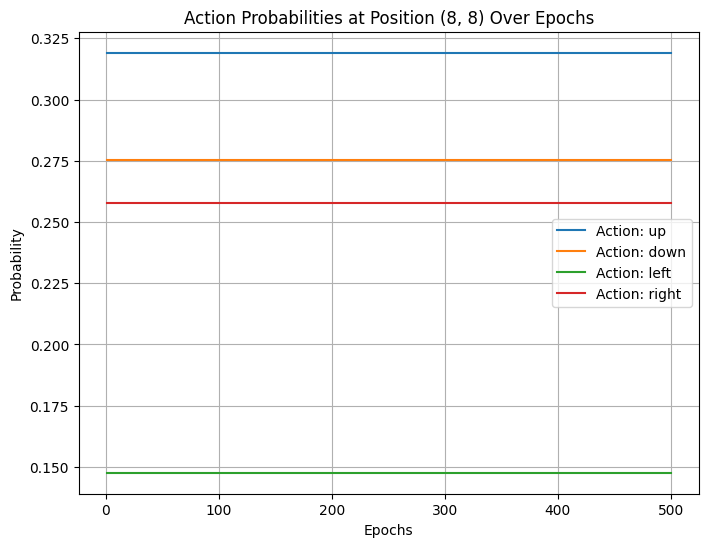

Training Complete!


In [13]:
train_agent()

In [14]:

def get_next_position(position, action):
    x, y = position
    if action == 'up' and x > 0 and maze[x - 1, y] == 1: x -= 1
    elif action == 'down' and x < maze.shape[0] - 1 and maze[x + 1, y] == 1: x += 1
    elif action == 'left' and y > 0 and maze[x, y - 1] == 1: y -= 1
    elif action == 'right' and y < maze.shape[1] - 1 and maze[x, y + 1] == 1: y += 1
    return (x, y)

def train_agent():
    for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
        position = start
        step_count = 0
        max_steps = 500

        while position != goal and step_count < max_steps:
            step_count += 1

            # Exploration vs Exploitation
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(actions) - 1)
            else:
                action_index = np.argmax(Q[position[0], position[1], :])

            action = actions[action_index]
            new_position = get_next_position(position, action)
            reward = 10 if new_position == goal else -1

            # Update Q-table
            Q[position[0], position[1], action_index] += alpha * (
                reward + gamma * np.max(Q[new_position[0], new_position[1], :]) -
                Q[position[0], position[1], action_index]
            )
            position = new_position

    print("\nTraining Complete! Final Q-values for each position:\n")
    display_q_values()

def display_q_values():
    # Print Q-values at each valid position
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 1:  # Only consider walkable positions
                q_values = Q[i, j, :]
                print(f"Position ({i}, {j}): ", end="")
                print(f"Up: {q_values[0]:.2f}, Down: {q_values[1]:.2f}, "
                      f"Left: {q_values[2]:.2f}, Right: {q_values[3]:.2f}")
    print("\nEnd of Q-value display.")

# Train the agent and display Q-values
train_agent()


Training Progress: 100%|██████████| 500/500 [00:00<00:00, 1069.20it/s]


Training Complete! Final Q-values for each position:

Position (1, 1): Up: -8.00, Down: -7.77, Left: -8.00, Right: -8.00
Position (1, 3): Up: -7.53, Down: -7.25, Left: -7.53, Right: -7.78
Position (1, 4): Up: -7.83, Down: -7.85, Left: -7.53, Right: -7.99
Position (1, 5): Up: -7.88, Down: -7.90, Left: -7.80, Right: -7.92
Position (1, 6): Up: -7.86, Down: -7.88, Left: -7.89, Right: -7.89
Position (1, 7): Up: -7.87, Down: -7.86, Left: -7.88, Right: -7.87
Position (1, 8): Up: -7.84, Down: -7.85, Left: -7.86, Right: -7.84
Position (2, 1): Up: -8.00, Down: -7.77, Left: -7.77, Right: -7.53
Position (2, 2): Up: -7.53, Down: -7.53, Left: -7.77, Right: -7.25
Position (2, 3): Up: -7.53, Down: -6.95, Left: -7.53, Right: -7.25
Position (2, 5): Up: -7.85, Down: -7.73, Left: -7.79, Right: -7.86
Position (2, 6): Up: -7.88, Down: -7.90, Left: -7.86, Right: -7.85
Position (2, 8): Up: -7.83, Down: -7.82, Left: -7.85, Right: -7.81
Position (3, 3): Up: -7.25, Down: -6.61, Left: -6.95, Right: -6.95
Positio

Training Progress: 100%|██████████| 500/500 [00:00<00:00, 1444.53it/s]



Training Complete! Final policy plot:


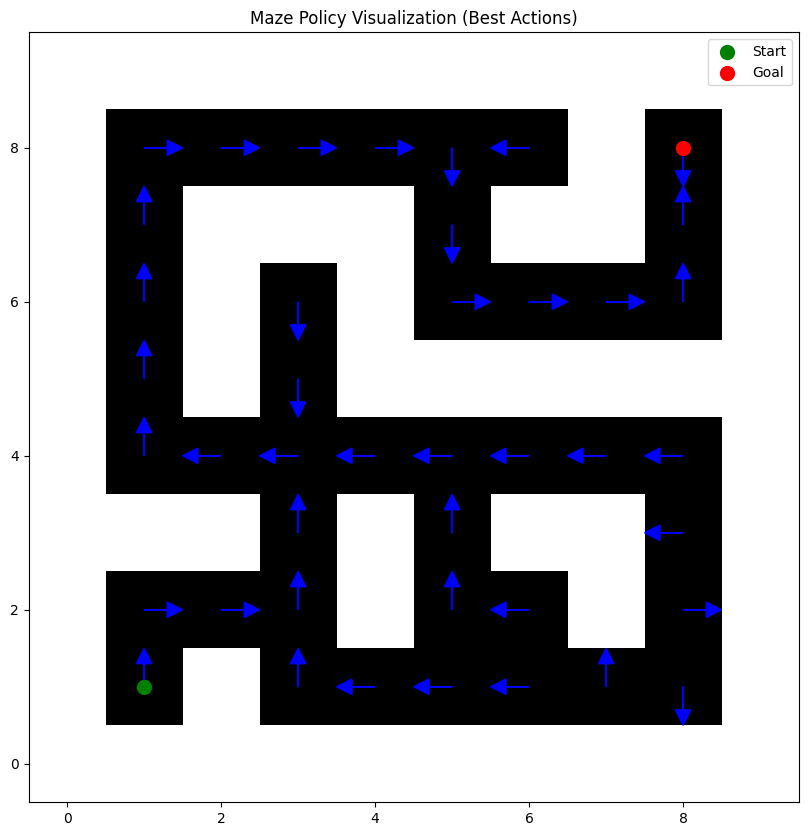

In [15]:
def get_next_position(position, action):
    x, y = position
    if action == 'up' and x > 0 and maze[x - 1, y] == 1: x -= 1
    elif action == 'down' and x < maze.shape[0] - 1 and maze[x + 1, y] == 1: x += 1
    elif action == 'left' and y > 0 and maze[x, y - 1] == 1: y -= 1
    elif action == 'right' and y < maze.shape[1] - 1 and maze[x, y + 1] == 1: y += 1
    return (x, y)

def train_agent():
    for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
        position = start
        step_count = 0
        max_steps = 500

        while position != goal and step_count < max_steps:
            step_count += 1

            # Exploration vs Exploitation
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(actions) - 1)
            else:
                action_index = np.argmax(Q[position[0], position[1], :])

            action = actions[action_index]
            new_position = get_next_position(position, action)
            reward = 10 if new_position == goal else -1

            # Update Q-table
            Q[position[0], position[1], action_index] += alpha * (
                reward + gamma * np.max(Q[new_position[0], new_position[1], :]) -
                Q[position[0], position[1], action_index]
            )
            position = new_position

    print("\nTraining Complete! Final policy plot:")
    plot_policy()

def plot_policy():
    plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap='gray_r')
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 1:  # Walkable position
                action_index = np.argmax(Q[i, j, :])
                action = actions[action_index]
                if action == 'up':
                    plt.arrow(j, i, 0, -0.3, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
                elif action == 'down':
                    plt.arrow(j, i, 0, 0.3, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
                elif action == 'left':
                    plt.arrow(j, i, -0.3, 0, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
                elif action == 'right':
                    plt.arrow(j, i, 0.3, 0, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
    plt.scatter(start[1], start[0], c='green', s=100, label="Start")
    plt.scatter(goal[1], goal[0], c='red', s=100, label="Goal")
    plt.title("Maze Policy Visualization (Best Actions)")
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to match matrix indexing
    plt.show()

# Train the agent and display the policy
train_agent()

Training Progress: 100%|██████████| 500/500 [00:00<00:00, 1290.24it/s]



Training Complete! Final policy plot:


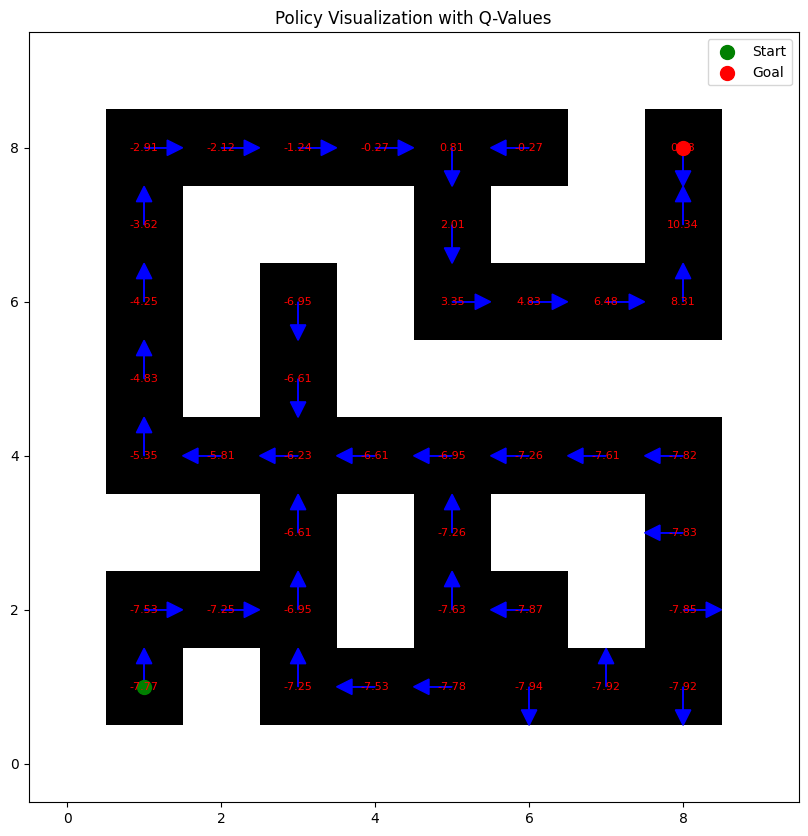

In [16]:
def get_next_position(position, action):
    x, y = position
    if action == 'up' and x > 0 and maze[x - 1, y] == 1: x -= 1
    elif action == 'down' and x < maze.shape[0] - 1 and maze[x + 1, y] == 1: x += 1
    elif action == 'left' and y > 0 and maze[x, y - 1] == 1: y -= 1
    elif action == 'right' and y < maze.shape[1] - 1 and maze[x, y + 1] == 1: y += 1
    return (x, y)

def train_agent():
    for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
        position = start
        step_count = 0
        max_steps = 500

        while position != goal and step_count < max_steps:
            step_count += 1

            # Exploration vs Exploitation
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(actions) - 1)
            else:
                action_index = np.argmax(Q[position[0], position[1], :])

            action = actions[action_index]
            new_position = get_next_position(position, action)
            reward = 10 if new_position == goal else -1

            # Update Q-table
            Q[position[0], position[1], action_index] += alpha * (
                reward + gamma * np.max(Q[new_position[0], new_position[1], :]) -
                Q[position[0], position[1], action_index]
            )
            position = new_position

    print("\nTraining Complete! Final policy plot:")
    plot_policy_with_qvalues()

def plot_policy_with_qvalues():
    plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap='gray_r')

    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 1:  # Walkable position
                # Get the best action and its Q-value
                best_action_index = np.argmax(Q[i, j, :])
                best_action = actions[best_action_index]
                best_q_value = Q[i, j, best_action_index]

                # Plot the arrow for the best action
                if best_action == 'up':
                    plt.arrow(j, i, 0, -0.3, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
                elif best_action == 'down':
                    plt.arrow(j, i, 0, 0.3, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
                elif best_action == 'left':
                    plt.arrow(j, i, -0.3, 0, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
                elif best_action == 'right':
                    plt.arrow(j, i, 0.3, 0, head_width=0.2, head_length=0.2, fc='blue', ec='blue')

                # Display the Q-value as text next to the position
                plt.text(j, i, f"{best_q_value:.2f}", fontsize=8, ha='center', va='center', color='red')

    # Mark start and goal
    plt.scatter(start[1], start[0], c='green', s=100, label="Start")
    plt.scatter(goal[1], goal[0], c='red', s=100, label="Goal")
    plt.title("Policy Visualization with Q-Values")
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to match matrix indexing
    plt.show()

# Train the agent and display the policy
train_agent()

Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 500/500 [00:00<00:00, 1398.12it/s]



Training Complete! Final policy plot:


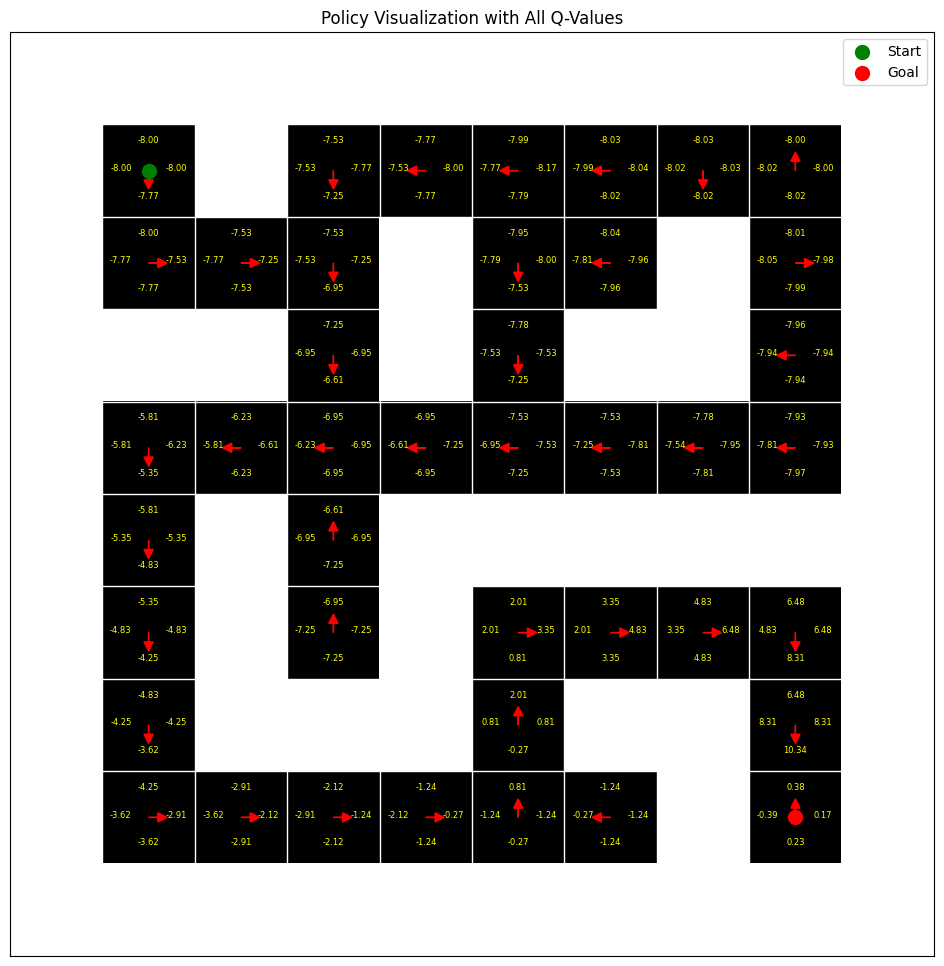

: 

In [ ]:
def get_next_position(position, action):
    x, y = position
    if action == 'up' and x > 0 and maze[x - 1, y] == 1: x -= 1
    elif action == 'down' and x < maze.shape[0] - 1 and maze[x + 1, y] == 1: x += 1
    elif action == 'left' and y > 0 and maze[x, y - 1] == 1: y -= 1
    elif action == 'right' and y < maze.shape[1] - 1 and maze[x, y + 1] == 1: y += 1
    return (x, y)

def train_agent():
    for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
        position = start
        step_count = 0
        max_steps = 500

        while position != goal and step_count < max_steps:
            step_count += 1

            # Exploration vs Exploitation
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(actions) - 1)
            else:
                action_index = np.argmax(Q[position[0], position[1], :])

            action = actions[action_index]
            new_position = get_next_position(position, action)
            reward = 10 if new_position == goal else -1

            # Update Q-table
            Q[position[0], position[1], action_index] += alpha * (
                reward + gamma * np.max(Q[new_position[0], new_position[1], :]) -
                Q[position[0], position[1], action_index]
            )
            position = new_position

    print("\nTraining Complete! Final policy plot:")
    plot_policy_with_qvalues()

def plot_policy_with_qvalues():
    plt.figure(figsize=(12, 12))
    plt.imshow(maze, cmap='gray_r')  # Plot the maze
    plt.grid(visible=True, color='white', linestyle='-', linewidth=1)  # Gridlines
    plt.xticks(np.arange(-0.5, maze.shape[1], 1), [])  # Set x-ticks
    plt.yticks(np.arange(-0.5, maze.shape[0], 1), [])  # Set y-ticks
    plt.gca().set_xticks(np.arange(-0.5, maze.shape[1], 1), minor=True)  # Minor gridlines
    plt.gca().set_yticks(np.arange(-0.5, maze.shape[0], 1), minor=True)
    #plt.gca().invert_yaxis()  # Align the y-axis properly
    plt.grid(which="minor", color="black", linestyle='-', linewidth=1)
    plt.tick_params(which='both', bottom=False, left=False)  # Remove axis ticks
    

    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 1:  # Walkable position
                # Get the Q-values for all actions
                q_values = Q[i, j, :]
                best_action_index = np.argmax(q_values)
                best_action = actions[best_action_index]

                # Plot the Q-values at respective positions
                plt.text(j, i - 0.3, f"{q_values[0]:.2f}", fontsize=6, ha='center', color='yellow')  # Up
                plt.text(j, i + 0.3, f"{q_values[1]:.2f}", fontsize=6, ha='center', color='yellow')  # Down
                plt.text(j - 0.3, i, f"{q_values[2]:.2f}", fontsize=6, ha='center', color='yellow')  # Left
                plt.text(j + 0.3, i, f"{q_values[3]:.2f}", fontsize=6, ha='center', color='yellow')  # Right

                # Display the best action as an arrow
                if best_action == 'up':
                    plt.arrow(j, i, 0, -0.1, head_width=0.1, head_length=0.1, fc='red', ec='red')
                elif best_action == 'down':
                    plt.arrow(j, i, 0, 0.1, head_width=0.1, head_length=0.1, fc='red', ec='red')
                elif best_action == 'left':
                    plt.arrow(j, i, -0.1, 0, head_width=0.1, head_length=0.1, fc='red', ec='red')
                elif best_action == 'right':
                    plt.arrow(j, i, 0.1, 0, head_width=0.1, head_length=0.1, fc='red', ec='red')

    # Mark start and goal
    plt.scatter(start[1], start[0], c='green', s=100, label="Start")
    plt.scatter(goal[1], goal[0], c='red', s=100, label="Goal")
    plt.title("Policy Visualization with All Q-Values")
    plt.legend()
    # plt.gca().invert_yaxis()  # Invert y-axis to match matrix indexing
    plt.show()

# Train the agent and display the policy with Q-values
train_agent()